# Hmov units: Compare unit overview plot, unit info and Hmov RF models

## TODO

## Setup

### Start DJD
Run main.py as interactive (-i) module (-m) and remotely (-r)\
NOTE: any code inside the DJD-executing cell other than the executing line is not allowed

In [2]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from djd import hmov_models
from djd import hmov_unit
from l6s import l6s_utils # Layer 6 suppression code repo with utility functions for plotting unit overview

# This import does not seem to work - WHY? works for other DJD modules and functions - circular import?
# from djd.hmov_unit import get_tranges_hmov, _get_xptranges  

Importing l6s package.


In [4]:
%load_ext autoreload
%autoreload 2

## Load model figure from Lisa

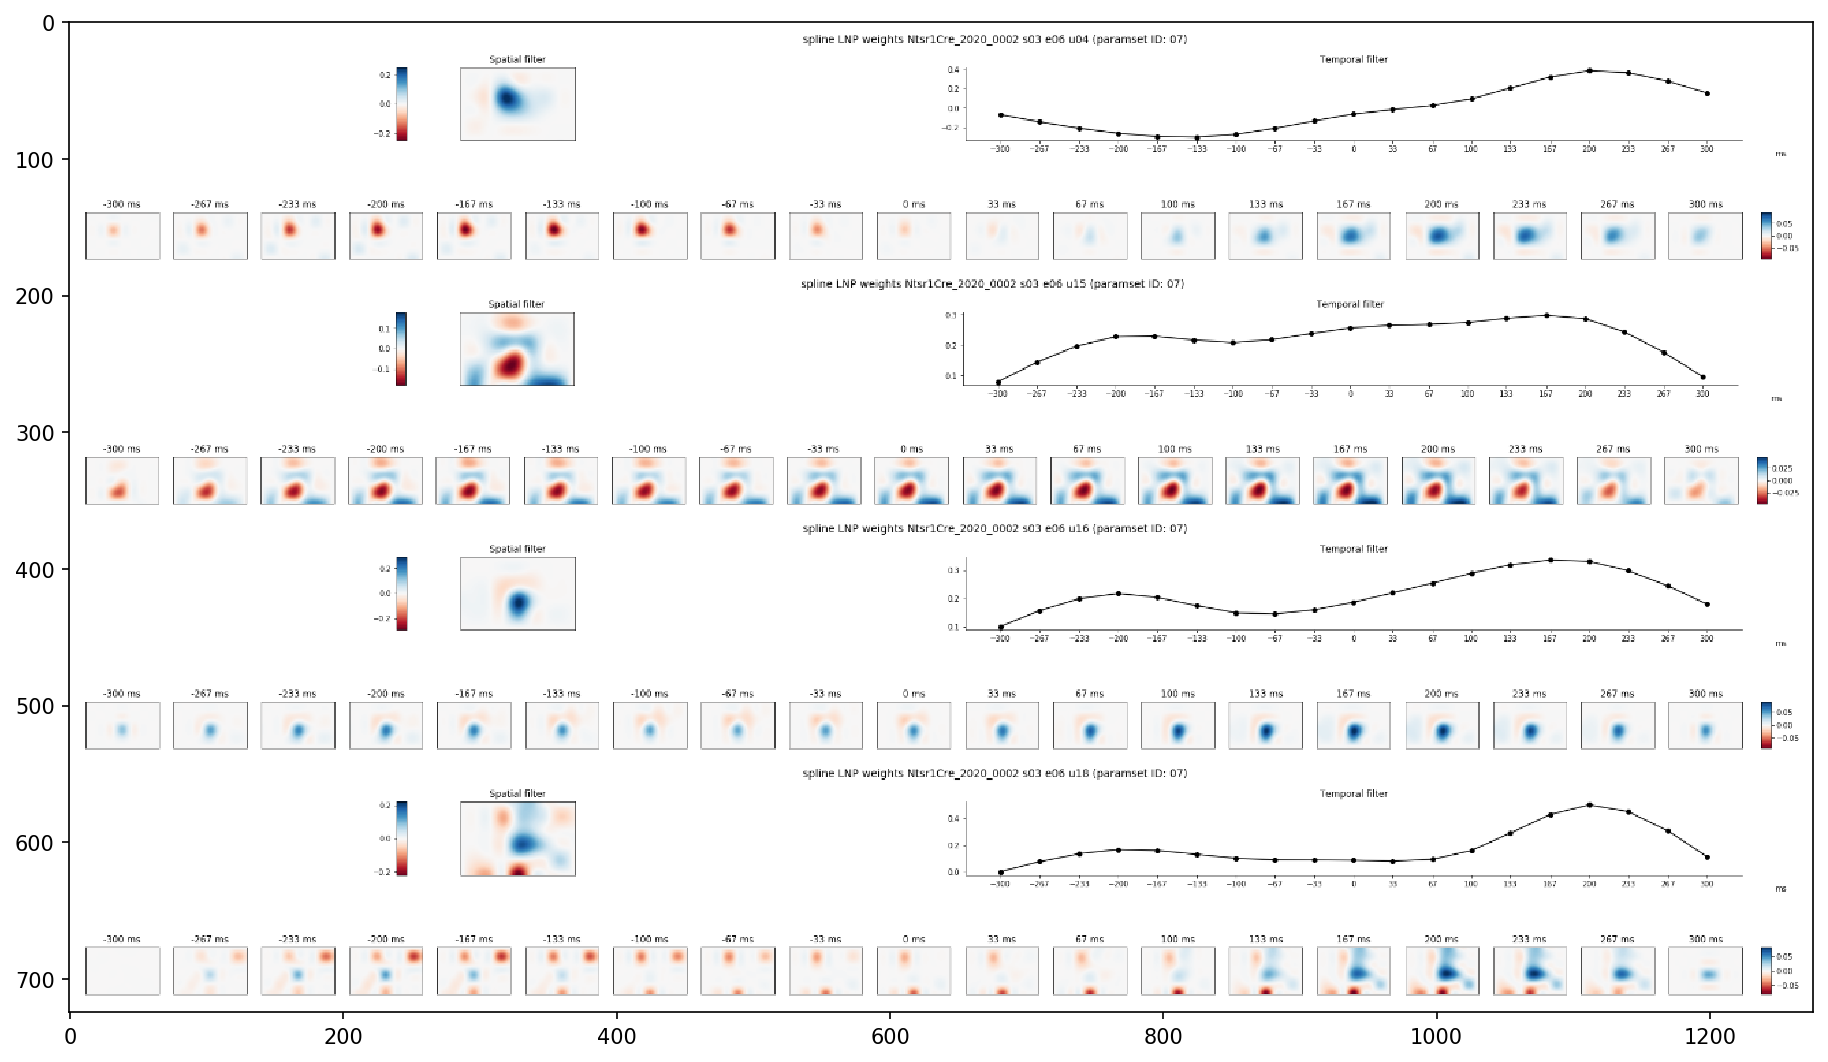

In [4]:
fig, ax = plt.subplots(figsize=[15,10], dpi=150)
image = mpimg.imread("glm_future_rfs.png")
ax.imshow(image)

In [4]:
# List of units example provided by Lisa that show 'future' RFs in the GLM
ukey1 = {'m': 'Ntsr1Cre_2020_0002', 's':3, 'u':4, 'e':1}
ukey2 = {'m': 'Ntsr1Cre_2020_0002', 's':3, 'u':15, 'e':1}
ukey3 = {'m': 'Ntsr1Cre_2020_0002', 's':3, 'u':16, 'e':1}
ukey4 = {'m': 'Ntsr1Cre_2020_0002', 's':3, 'u':18, 'e':1}
ukeys = [ukey1, ukey2, ukey3, ukey4,]

## Plot GLM for example unit

In [15]:
glm_mean_test = np.round(np.mean(Glm.GlmEval().fetch('glm_r_test')), 3)
glm_std_test = np.round(np.std(Glm.GlmEval().fetch('glm_r_test')), 3)

In [17]:
glm_keys = (Glm * Glm.GlmEval() & ('glm_r_test > {:.3f}'.format(glm_mean_test+2*glm_std_test)) & {'m':'Ntsr1Cre_2019_0008'} ).fetch(dj.key)
print('Number of units that are better than mean correlation + 2 times std: ', len(glm_keys))
glm_keys

Number of units that are better than mean correlation + 2 times std:  1


[{'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 9, 'glm_paramset': 1}]

{'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 9, 'glm_paramset': 1}


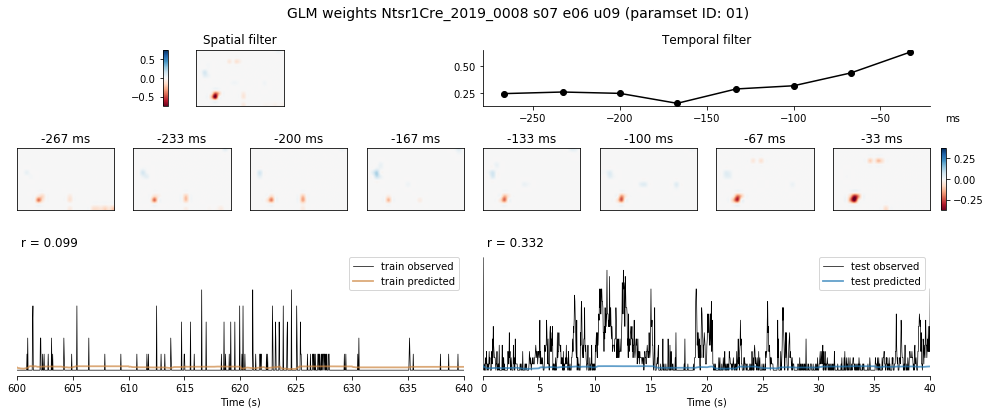

In [20]:
glm._plot_RF(glm_keys[0])

## Plot SplineLNP for example units

In [25]:
paramset = 7
spl_mean_test = np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3)
spl_std_test = np.round(np.std((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3)

In [26]:
spl_keys = (SplineLNP * SplineLNP.SplineLNPEval() & {'spl_paramset':paramset} & ('spl_r_test > {:.3f}'.format(spl_mean_test+1.5*spl_std_test)) & {'m':'Ntsr1Cre_2019_0008'} ).fetch(dj.key)
print('Number of units that are better than mean correlation + 1.5 times std: ', len(spl_keys))

Number of units that are better than mean correlation + 1.5 times std:  3


{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 7}


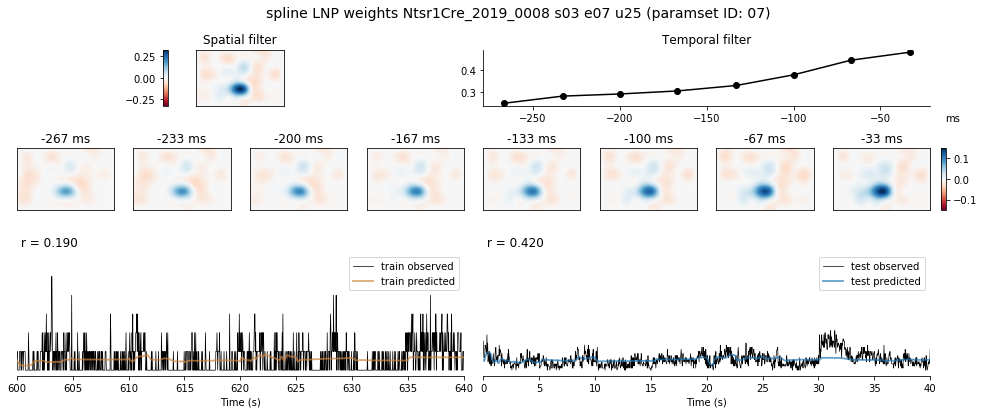

{'m': 'Ntsr1Cre_2019_0008', 's': 6, 'e': 6, 'u': 46, 'spl_paramset': 7}


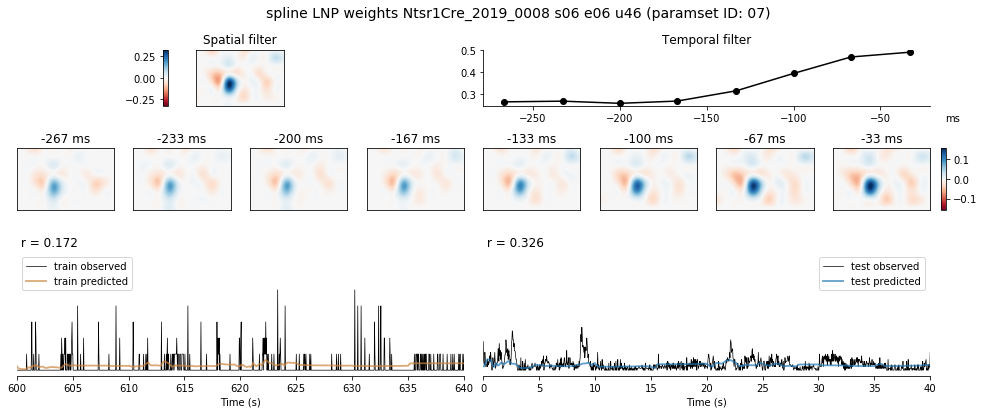

{'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 6, 'spl_paramset': 7}


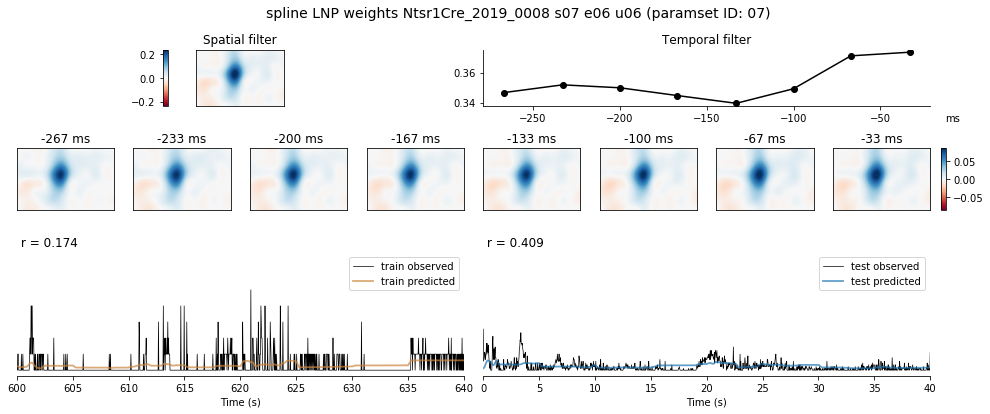

In [28]:
for key in spl_keys:
    glm._plot_RF(key)
    plt.show()

## Show SplineLNP RF and plot_unit_overview() and show unit info

get_combined_unit_info(): Getting combined unit info.
  Loading previous mseu df file:
   /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/unit_info_20201214.csv


/Users/ybauer/code/djd/djd/tuning.py:706: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(hspace=0.5)
/Users/ybauer/code/djd/djd/unit.py:1684: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


No oriTun experiment found for [{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 5, 'u': 25}] with model 'sum_of_gaussians' and state type 'none'.
> /Users/ybauer/code/djd/djd/hmov_unit.py(258)plot_opto_cond_psth()
-> key = self.fetch(dj.key, as_dict=True)


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(369)get_all_tranges()
-> if not ((Event.Times() & key).fetch(dj.key)):


(Pdb)  c


hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).


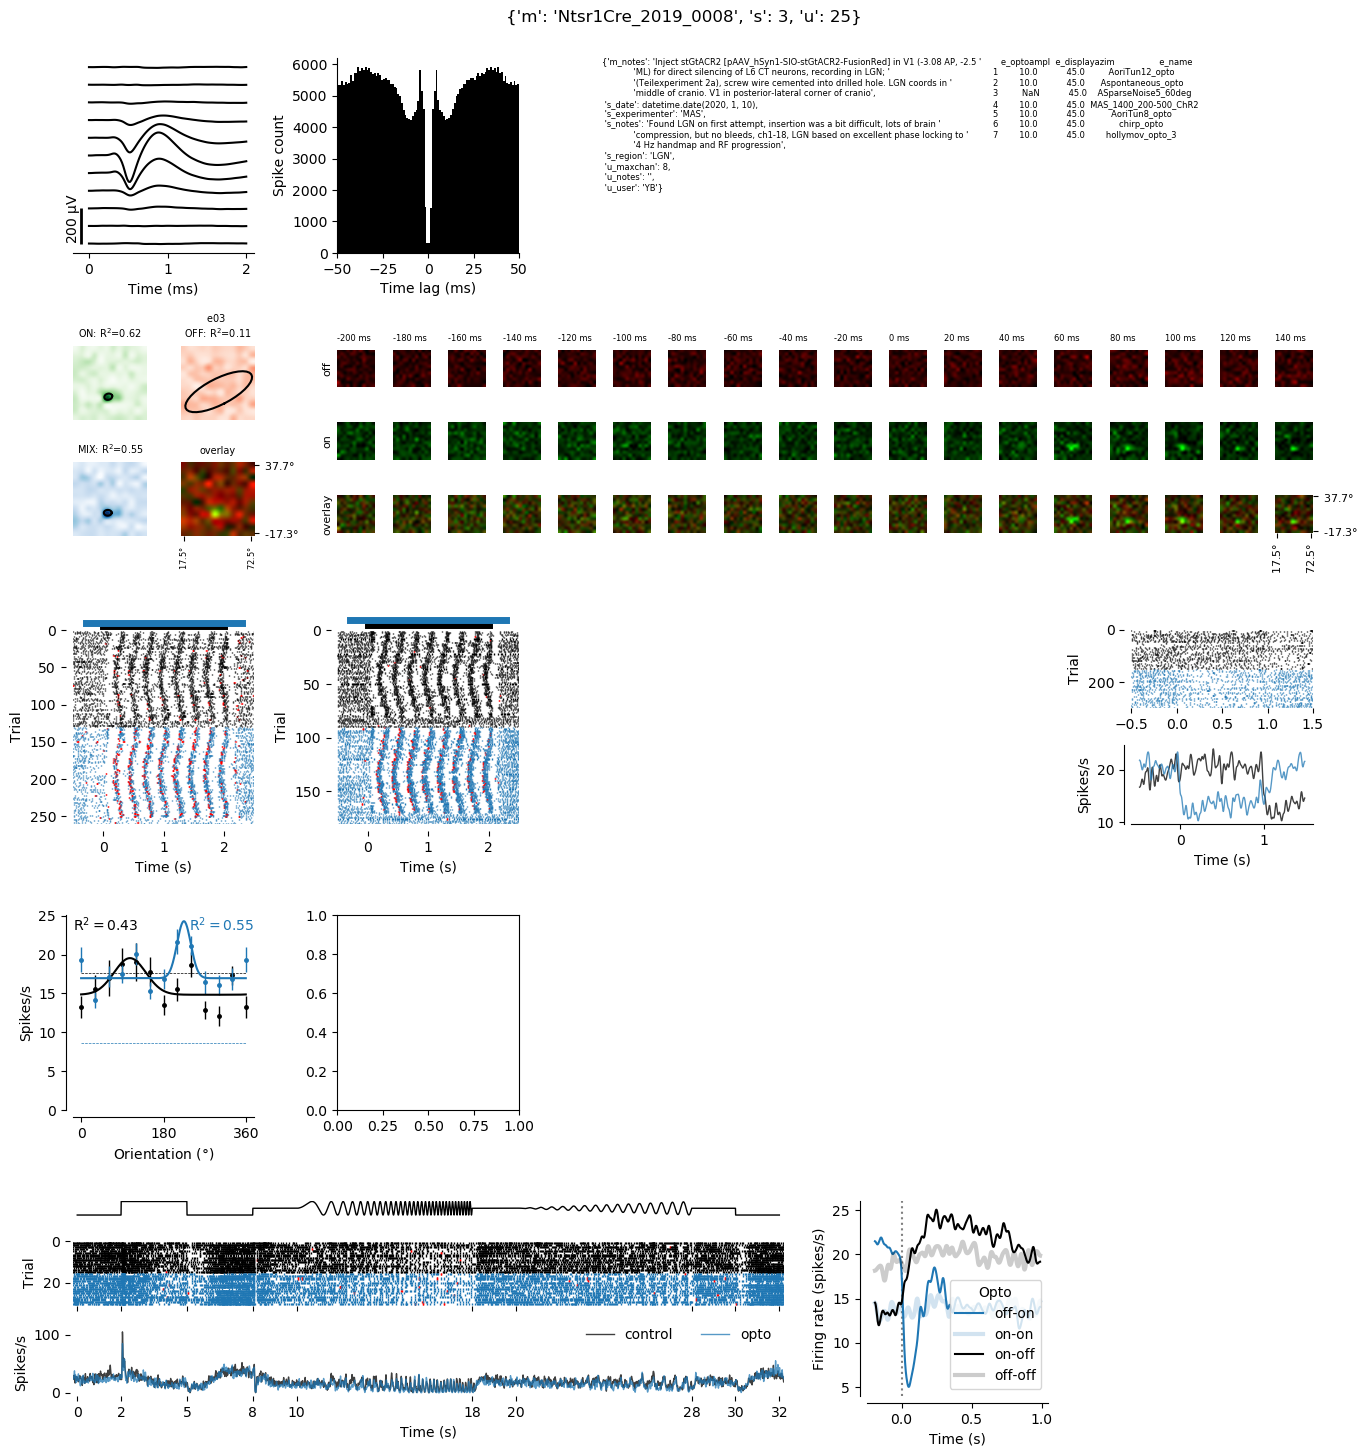


Unit info:

     e                 e_name    fr_mean  fr_mean_sem    fr_ctrl  fr_ctrl_sem    fr_opto  fr_opto_sem  fr_spon_ctrl  fr_spon_ctrl_sem  fr_spon_opto  fr_spon_opto_sem       OMI  SNR_opto  SNR_ctrl  \
416  1         AoriTun12_opto  16.838846     0.517942  15.965517     0.726720  17.712175     0.674564       17.6168           2.60069       8.58377           1.15208  0.051864       NaN       NaN   
430  2      Aspontaneous_opto        NaN          NaN        NaN          NaN        NaN          NaN           NaN               NaN           NaN               NaN       NaN       NaN       NaN   
444  3    ASparseNoise5_60deg  12.213304     0.210782  12.230728     0.412451  11.419186     0.665298           NaN               NaN           NaN               NaN -0.034315       NaN       NaN   
458  4  MAS_1400_200-500_ChR2  29.492450          NaN  31.093700          NaN  27.891200          NaN           NaN               NaN           NaN               NaN -0.054294       NaN      

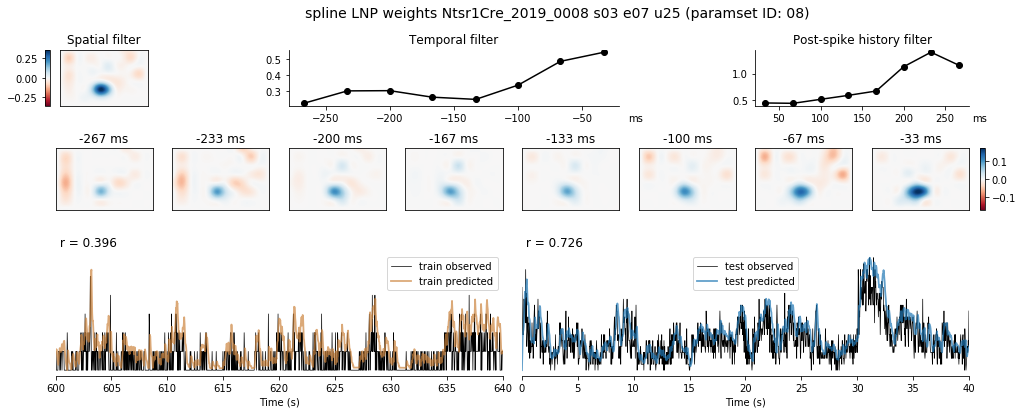

In [7]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 8}

# Get unit info df
unit_info_df = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20201214')

# Plot unit overview
axs = l6s_utils.plot_unit_overview(ukey, save=False, unit_info_df=unit_info_df)

# Plot SplineLNP RF
hmov_models._plot_RF(ukey, scale=True)

get_combined_unit_info(): Getting combined unit info.
  Loading previous mseu df file:
   /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/unit_info_20201214.csv


/Users/ybauer/code/djd/djd/tuning.py:706: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(hspace=0.5)
/Users/ybauer/code/djd/djd/unit.py:1684: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


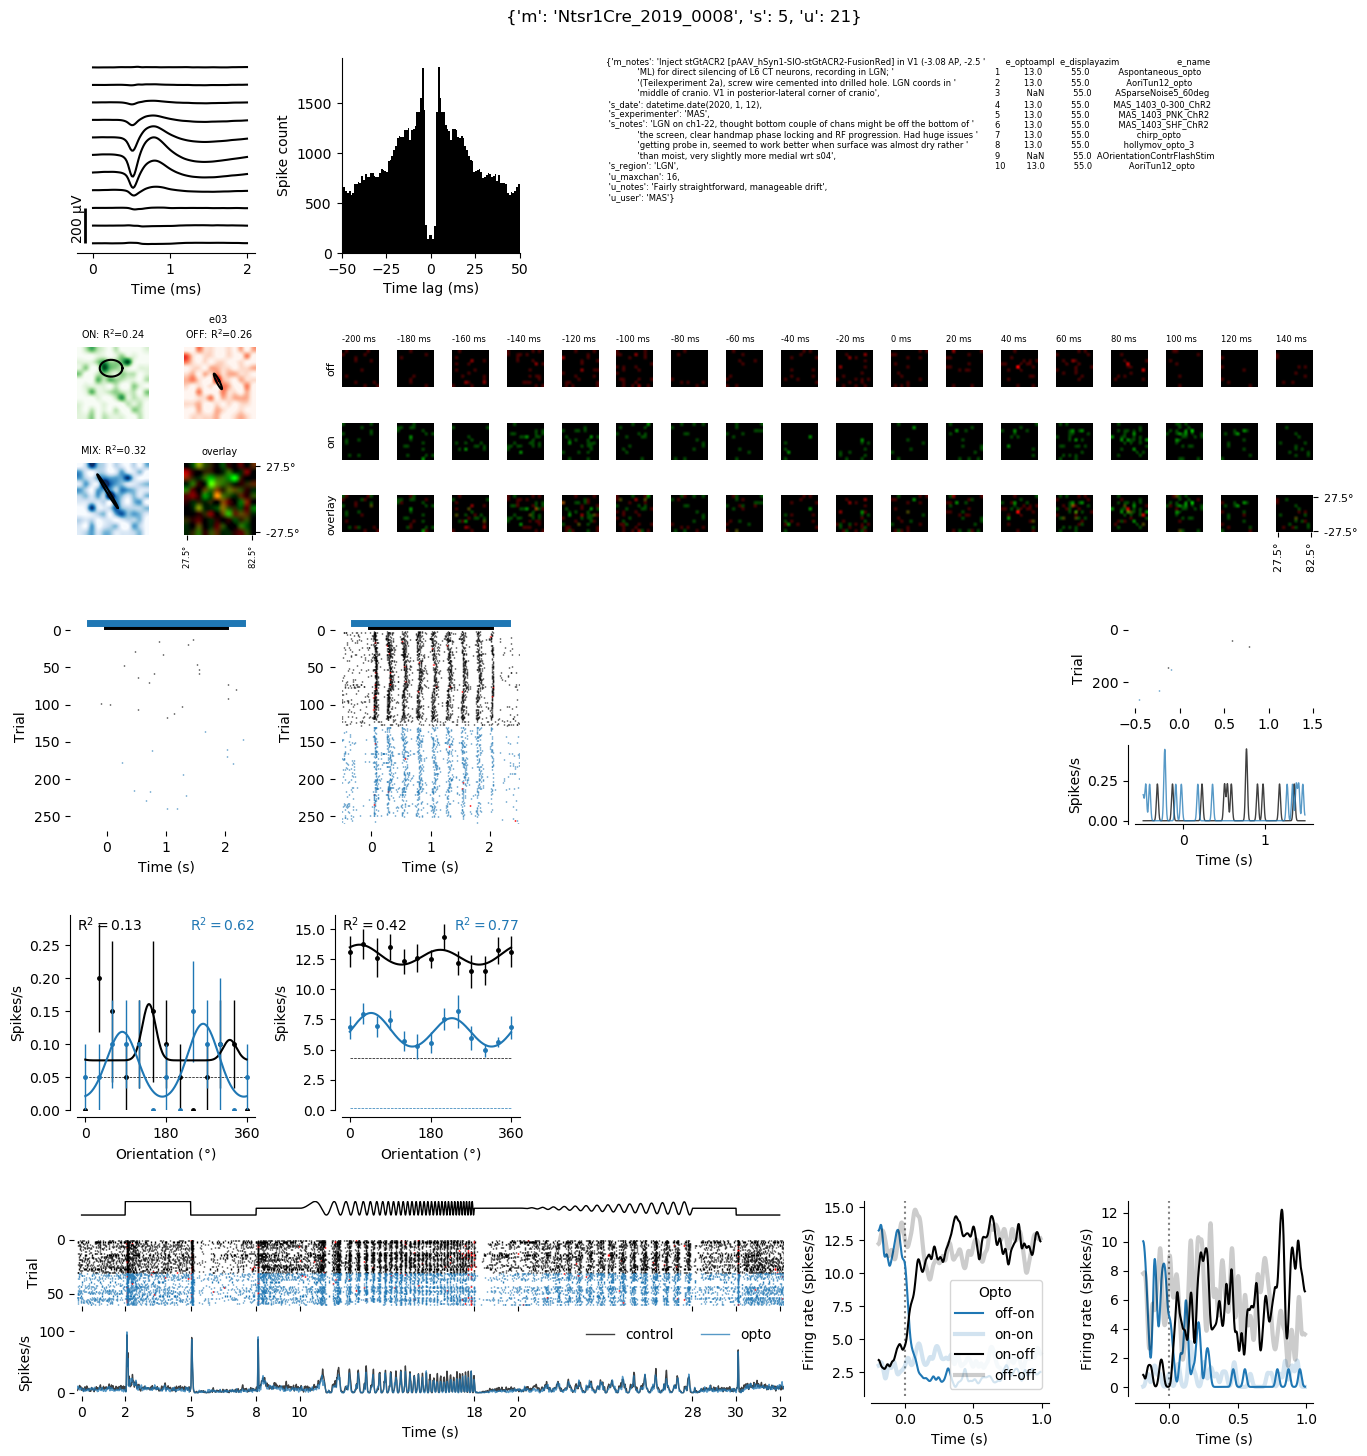


Unit info:

      e               e_name   fr_mean  fr_mean_sem    fr_ctrl  fr_ctrl_sem   fr_opto  fr_opto_sem  fr_spon_ctrl  fr_spon_ctrl_sem  fr_spon_opto  fr_spon_opto_sem       OMI  SNR_opto  SNR_ctrl  \
504   1    Aspontaneous_opto       NaN          NaN        NaN          NaN       NaN          NaN           NaN               NaN           NaN               NaN       NaN       NaN       NaN   
510   2       AoriTun12_opto  0.076937     0.011231   0.087334     0.017510  0.066540     0.014187      0.049905          0.049905      0.000000          0.000000 -0.135132       NaN       NaN   
516   3  ASparseNoise5_60deg  0.276472     0.018369   0.228803     0.060208  0.176792     0.067776           NaN               NaN           NaN               NaN -0.128233       NaN       NaN   
522   4  MAS_1403_0-300_ChR2  2.873825          NaN   4.303010          NaN  1.444640          NaN           NaN               NaN           NaN               NaN -0.497311       NaN       NaN   
528   5

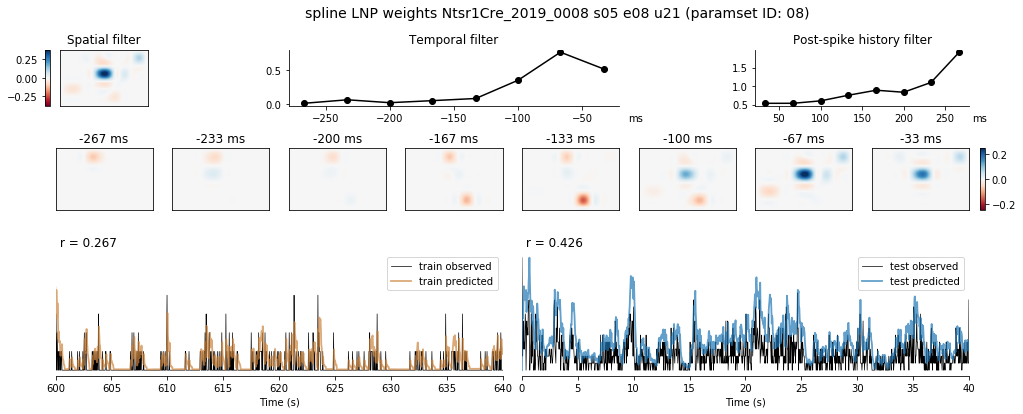

In [90]:
# Define unit key
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 21, 'spl_paramset': 8}

# Get unit info df
unit_info_df = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20201214')

# Plot unit overview
axs = l6s_utils.plot_unit_overview(ukey, save=False, unit_info_df=unit_info_df)

# Plot SplineLNP RF
hmov_models._plot_RF(ukey, scale=True)

In [8]:
axs

{'wave': <matplotlib.axes._subplots.AxesSubplot at 0x7fa98194a210>,
 'acorr': <matplotlib.axes._subplots.AxesSubplot at 0x7fa971789d50>,
 'info_text': [<matplotlib.axes._subplots.AxesSubplot at 0x7fa992ae6350>,
 'rf': [<matplotlib.axes._subplots.AxesSubplot at 0x7fa9717e7550>,
 'sta': array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9717e3a50>,
       dtype=object),
 'ori': [<matplotlib.axes._subplots.AxesSubplot at 0x7fa9af19c790>,
 'ori2': None,
 'spon': [<matplotlib.axes._subplots.AxesSubplot at 0x7fa970e5c090>,
 'chirp': [<matplotlib.axes._subplots.AxesSubplot at 0x7fa997481c50>,
 'hmov': <matplotlib.axes._subplots.AxesSubplot at 0x7fa98215e450>}

## Test plot_opto_cond_psth()

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 8).


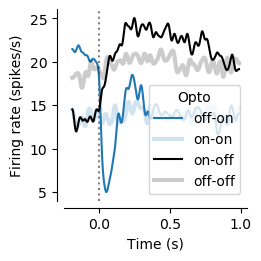

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
nrows, ncols = 1, 1
axlength = 2.5
fig = plt.figure(figsize=[ncols*axlength, nrows*axlength],
                 constrained_layout=True, dpi=100)
gs = gridspec.GridSpec(figure=fig, ncols=ncols, nrows=nrows)  # width_ratios
ax_hmov = fig.add_subplot(gs[0,0])

ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 8}
hmovkey = ((Unit.Spikes() & ukey) * (Series.Experiment() & 'e_name LIKE "%hollymov%"')
            ).fetch(dj.key, as_dict=True)
(HmovUnit() & hmovkey).plot_opto_cond_psth(ax=ax_hmov, title=False, legend_frame=True, move_spines=5)

## Test changes to hmov_unit.py functions:
- plot_opto_cond_psth()
- get_opto_cond_psth()
- get_tranges_hmov()
- get_xptranges()
- _get_omi()

In [53]:
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8}
ukey = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u':15}

> /Users/ybauer/code/djd/djd/hmov_unit.py(268)plot_opto_cond_psth()
-> key = self.fetch(dj.key, as_dict=True)


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(281)plot_opto_cond_psth()
-> psths_cond, midbins, labels = get_opto_cond_psths(key, offsets=offsets,


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(364)get_opto_cond_psths()
-> key = (Unit.Spikes() & key).fetch(dj.key, as_dict=True)


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(371)get_opto_cond_psths()
-> tranges_all = get_tranges_hmov(key, stimcond=stimcond)


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(462)get_tranges_hmov()
-> if not ((Event.Times() & key).fetch(dj.key)):


(Pdb)  c


hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).
> /Users/ybauer/code/djd/djd/hmov_unit.py(524)get_tranges_hmov()
-> if stimcond == 'stim':


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(374)get_opto_cond_psths()
-> if tranges_all.size == 0:


(Pdb)  c


> /Users/ybauer/code/djd/djd/hmov_unit.py(381)get_opto_cond_psths()
-> _, _, opto = (Unit.Spikes() & key).get_tranges(tranges=tranges_all)


(Pdb)  c


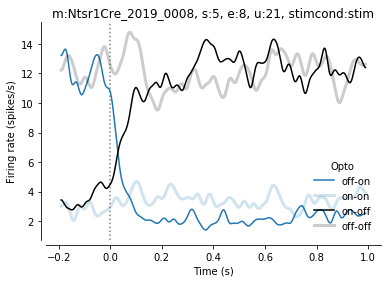

In [69]:
# ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 8}
# ukey = {'m': 'Ntsr1Cre_2020_0002', 's': 3, 'e': 6, 'u':15}
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u':21}

hmovkey = ((Unit.Spikes() & ukey) * (Series.Experiment() & 'e_name LIKE "%hollymov%"')
            ).fetch(dj.key, as_dict=True)

# Call plot_opto_cond_psth() with stimcond='stim' is old default
(HmovUnit() & hmovkey).plot_opto_cond_psth(stimcond='stim')

In [24]:
ukey = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u':21}
xptranges_spont = hmov_unit._get_xptranges_spont(ukey)
xptranges_spont

array([[-8.33300000e-03,  6.01077670e+01],
       [ 1.86359237e+03,  1.92370847e+03]])

In [25]:
print(xptranges_spont[0,0], xptranges_spont[0,1])

-0.008333 60.107766999999996


In [19]:
tranges_incl_spont = hmov_unit.get_tranges_hmov(ukey, stimcond='all')
tranges_incl_spont

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


array([[1.560000e-02, 1.015600e+00],
       [1.031200e+00, 2.031200e+00],
       [2.046800e+00, 3.046800e+00],
       ...,
       [1.920829e+03, 1.921829e+03],
       [1.921831e+03, 1.922831e+03],
       [1.922833e+03, 1.923833e+03]])

In [20]:
tranges_incl_spont.shape

(1916, 2)

In [21]:
tranges_incl_spont[0:10,:]

array([[ 0.0156,  1.0156],
       [ 1.0312,  2.0312],
       [ 2.0468,  3.0468],
       [ 3.0625,  4.0625],
       [ 4.0645,  5.0645],
       [ 5.0665,  6.0665],
       [ 6.0685,  7.0685],
       [ 7.0705,  8.0705],
       [ 8.0725,  9.0725],
       [ 9.0745, 10.0745]])

In [27]:
from .util import ConvenienceTable, intersect_tranges, key2datafname, event_in_interval
tranges = tranges_incl_spont[intersect_tranges(xptranges_spont, tranges_incl_spont)]
tranges

array([[1.5600000e-02, 1.0156000e+00],
       [1.0312000e+00, 2.0312000e+00],
       [2.0468000e+00, 3.0468000e+00],
       [3.0625000e+00, 4.0625000e+00],
       [4.0645000e+00, 5.0645000e+00],
       [5.0665000e+00, 6.0665000e+00],
       [6.0685000e+00, 7.0685000e+00],
       [7.0705000e+00, 8.0705000e+00],
       [8.0725000e+00, 9.0725000e+00],
       [9.0745000e+00, 1.0074500e+01],
       [1.0076500e+01, 1.1076500e+01],
       [1.1078500e+01, 1.2078000e+01],
       [1.2080000e+01, 1.3080000e+01],
       [1.3082000e+01, 1.4082000e+01],
       [1.4084000e+01, 1.5084000e+01],
       [1.5086000e+01, 1.6086000e+01],
       [1.6088000e+01, 1.7088000e+01],
       [1.7090000e+01, 1.8090000e+01],
       [1.8092000e+01, 1.9092000e+01],
       [1.9094000e+01, 2.0094000e+01],
       [2.0096000e+01, 2.1096000e+01],
       [2.1098000e+01, 2.2098000e+01],
       [2.2100000e+01, 2.3100000e+01],
       [2.3102000e+01, 2.4102000e+01],
       [2.4104000e+01, 2.5104000e+01],
       [2.5106000e+01, 2.

In [28]:
tranges.shape

(121, 2)

In [30]:
tranges2 = hmov_unit.get_tranges_hmov(ukey, stimcond='spont')
tranges2

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


array([[1.5600000e-02, 1.0156000e+00],
       [1.0312000e+00, 2.0312000e+00],
       [2.0468000e+00, 3.0468000e+00],
       [3.0625000e+00, 4.0625000e+00],
       [4.0645000e+00, 5.0645000e+00],
       [5.0665000e+00, 6.0665000e+00],
       [6.0685000e+00, 7.0685000e+00],
       [7.0705000e+00, 8.0705000e+00],
       [8.0725000e+00, 9.0725000e+00],
       [9.0745000e+00, 1.0074500e+01],
       [1.0076500e+01, 1.1076500e+01],
       [1.1078500e+01, 1.2078000e+01],
       [1.2080000e+01, 1.3080000e+01],
       [1.3082000e+01, 1.4082000e+01],
       [1.4084000e+01, 1.5084000e+01],
       [1.5086000e+01, 1.6086000e+01],
       [1.6088000e+01, 1.7088000e+01],
       [1.7090000e+01, 1.8090000e+01],
       [1.8092000e+01, 1.9092000e+01],
       [1.9094000e+01, 2.0094000e+01],
       [2.0096000e+01, 2.1096000e+01],
       [2.1098000e+01, 2.2098000e+01],
       [2.2100000e+01, 2.3100000e+01],
       [2.3102000e+01, 2.4102000e+01],
       [2.4104000e+01, 2.5104000e+01],
       [2.5106000e+01, 2.

In [31]:
tranges2.shape

(120, 2)

hmov_unit.py: get_all_tranges(): Opto stimulations longer than 1 sec detected. Excluding (n = 14).


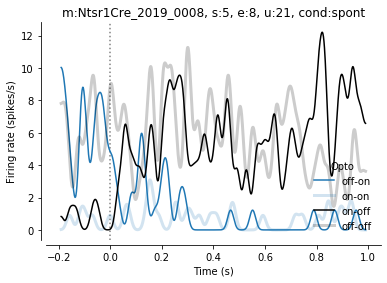

In [33]:
(HmovUnit() & ukey).plot_opto_cond_psth(stimcond='spont')